In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
import numpy as np
from keras.utils import to_categorical


import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
from keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [ ]:


val_data = pd.read_csv('/content/validation.csv')
train_data = pd.read_csv('/content/training.csv')
test_data = pd.read_csv('/content/test.csv')
half_test_data = test_data.iloc[1000:]
test_data = test_data.iloc[:1000]

In [ ]:



val_data = pd.concat([val_data, half_test_data], axis=0)

print("new Vald data :",val_data.shape)
print("new Test data :",test_data.shape)

labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train_data['label_name'] = train_data['label'].map(labels_dict)
train_data.head(10)

new Vald data : (3000, 2)
new Test data : (1000, 2)


,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
5,ive been feeling a little burdened lately wasn...,0,sadness
6,ive been taking or milligrams or times recomme...,5,surprise
7,i feel as confused about life as a teenager or...,4,fear
8,i have been with petronas for years i feel tha...,1,joy
9,i feel romantic too,2,love


new Vald data : (4000, 2)
new Test data : (1000, 2)


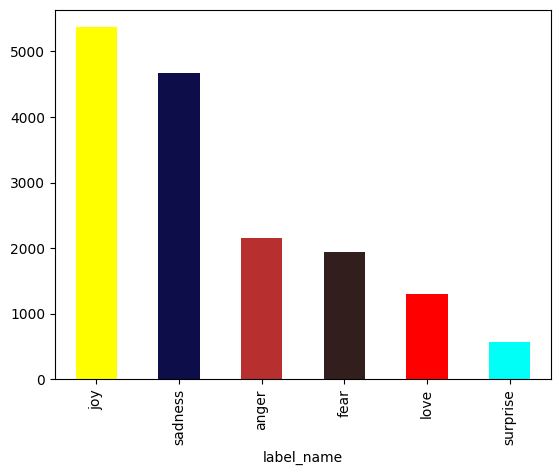

In [ ]:

val_data = pd.concat([val_data, half_test_data], axis=0)

print("new Vald data :",val_data.shape)
print("new Test data :",test_data.shape)

labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train_data['label_name'] = train_data['label'].map(labels_dict)
train_data.head()
train_data.groupby(["label_name","label"]).size()
train_data["label_name"].value_counts().plot(kind='bar',color=['yellow', '#0c0d49', '#b82f2f', '#331e1e', 'red','#00fff7'])
all_list = train_data['text'].tolist() + test_data['text'].tolist() + val_data['text'].tolist()
tokenizer1 = Tokenizer()
tokenizer1.fit_on_texts(all_list)
word_index1 = tokenizer1.word_index

In [ ]:
print("Number of words without Stemming:",len(word_index1))

stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in word_index1.keys()]

tokenizer2 = Tokenizer()
tokenizer2.fit_on_texts(stemmed_words)
word_index2 = tokenizer2.word_index

print("Number of words with Stemming:",len(word_index2))

def preprocess_data(data):
    new_data = []
    for index, row in data.iterrows():
        test_split = row['text'].split()
        stemmed_words2 = [stemmer.stem(word) for word in test_split]
        token_list= tokenizer2.texts_to_sequences([stemmed_words2])[0]
        new_data.append([token_list,row['label']])
    return new_data

new_train_data = preprocess_data(train_data)
print(train_data['text'][2])
print(new_train_data[2])
new_val_data = preprocess_data(val_data)
print(val_data['text'][0])
print(new_val_data[0])
# Splitting into train_X and train_y
train_X = [row[0] for row in new_train_data]
train_y = [row[1] for row in new_train_data]

# Print the results
print("train_X:", train_X[0])
print("train_y:", train_y[0])
val_X = [row[0] for row in new_val_data]
val_y = [row[1] for row in new_val_data]

print("train_X:", val_X[0])
print("train_y:", val_y[0])
length_of_longest_sentence = len(max(train_X, key=len))
print(length_of_longest_sentence)
print(max(train_X, key=len))
for i in range(len(train_X)):
    for j in range(length_of_longest_sentence-len(train_X[i])):
        train_X[i].append(0)

for i in range(len(val_X)):
    for j in range(length_of_longest_sentence-len(val_X[i])):
        val_X[i].append(0)

train_X = np.array(train_X)
train_y = np.array(train_y)
val_X = np.array(val_X)
val_y = np.array(val_y)

print(train_X.shape,train_y.shape)
print(val_X.shape,val_y.shape)

Number of words without Stemming: 17096
Number of words with Stemming: 11705
im grabbing a minute to post i feel greedy wrong
[[3205, 881, 3202, 1445, 3200, 97, 3198, 220, 3368, 259], 3]
im feeling quite sad and sorry for myself but ill snap out of it soon
[[3205, 220, 595, 1335, 3199, 3326, 3206, 3227, 3207, 1326, 523, 1283, 1274, 1276, 3373], 0]
train_X: [3198, 3266, 220, 669]
train_y: 0
train_X: [3205, 220, 595, 1335, 3199, 3326, 3206, 3227, 3207, 1326, 523, 1283, 1274, 1276, 3373]
train_y: 0
66
[3198, 612, 3250, 3585, 3217, 3204, 3198, 912, 3245, 1498, 3245, 1353, 3217, 3245, 1303, 1296, 3200, 2039, 1284, 1276, 3220, 220, 3594, 3213, 220, 1276, 3530, 3217, 8139, 4305, 3221, 5632, 1542, 3244, 3198, 4305, 3221, 1542, 5633, 5633, 3198, 3573, 5632, 3198, 8140, 1276, 3200, 3202, 1293, 3219, 1401, 3967, 3594, 3213, 3223, 239, 3530, 3213, 85, 3269, 579, 1659, 3206, 3201, 239, 1289]
(16000, 66) (16000,)
(4000, 66) (4000,)


In [ ]:
# Convert labels to one-hot encoding
train_y_one_hot = to_categorical(train_y, num_classes=16000)
val_y_one_hot = to_categorical(val_y, num_classes=16000)

In [ ]:
model = Sequential()
model.add(Embedding(16000, 100, input_length=66))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(16000, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(train_X, train_y_one_hot, epochs=20, verbose=1,validation_data=(val_X,val_y_one_hot))
#print model.summary()
print(model)





Epoch 1/20
500/500 [==============================] - 35s 61ms/step - loss: 1.8453 - accuracy: 0.3246 - val_loss: 1.5821 - val_accuracy: 0.2805
Epoch 2/20
500/500 [==============================] - 11s 23ms/step - loss: 1.5941 - accuracy: 0.3196 - val_loss: 1.5816 - val_accuracy: 0.3550
Epoch 3/20
500/500 [==============================] - 11s 21ms/step - loss: 1.5935 - accuracy: 0.3209 - val_loss: 1.5814 - val_accuracy: 0.2805
Epoch 4/20
500/500 [==============================] - 9s 19ms/step - loss: 1.5856 - accuracy: 0.3271 - val_loss: 1.5633 - val_accuracy: 0.3550
Epoch 5/20
500/500 [==============================] - 9s 18ms/step - loss: 1.5308 - accuracy: 0.3849 - val_loss: 1.2444 - val_accuracy: 0.5497
Epoch 6/20
500/500 [==============================] - 8s 16ms/step - loss: 1.0143 - accuracy: 0.6015 - val_loss: 0.8873 - val_accuracy: 0.6572
Epoch 7/20
500/500 [==============================] - 9s 17ms/step - loss: 0.7286 - accuracy: 0.7144 - val_loss: 0.5639 - val_accuracy: 0.7

In [ ]:
def get_text_from_user():
  """Prompts the user to enter a sentence and returns a list of preprocessed tokens."""
  user_text = input("Enter a sentence describing your emotion: ")

  # Create a new tokenizer based on the user input
  user_tokenizer = Tokenizer()
  user_tokenizer.fit_on_texts([user_text])

  # Stemming and tokenization using the new tokenizer
  stemmed_words = [stemmer.stem(word) for word in user_tokenizer.word_index.keys()]
  tokens_list = user_tokenizer.texts_to_sequences([stemmed_words])[0]

  # Pad the sequence to match the maximum length from the training data
  for i in range(len(tokens_list)):
    for j in range(length_of_longest_sentence - len(tokens_list)):
      tokens_list.append(0)

  return tokens_list  # Now `tokens_list` is defined and returned

# Get preprocessed user input
user_input = get_text_from_user()

# Convert user input to a numpy array and reshape for prediction
user_input = np.array([user_input])
user_input = user_input.reshape(1,-1)

# Make predictions using the emotion prediction model
# Get predictions from the model
predictions = model.predict(user_input)

# Extract the predicted class index (argmax)
predicted_class = np.argmax(predictions[0])

# Convert class index to emotion label using your dictionary
predicted_label = labels_dict[predicted_class]

print("Predicted Emotion:", predicted_label)

Enter a sentence describing your emotion: I'm having a great day
1/1 [==============================] - 0s 20ms/step
Predicted Emotion: surprise


In [ ]:
import json
import random
import scipy.io.wavfile as wav
from transformers import MusicgenForConditionalGeneration, AutoProcessor
from IPython.display import Audio

# Load the data from the JSON file
with open('/content/emotions_and_music.json', 'r') as json_file:
    data = json.load(json_file)

# Function to generate and return a random item for the given emotion
def get_random_beat(emotion):
    if emotion in data:
        random_index = random.randint(0, 9)
        return data[emotion][random_index]
    else:
        return "Emotion not found in the data."

# Example usage
emotion = (predicted_label).lower()  # Convert the input to lowercase for case-insensitivity
random_beat = get_random_beat(emotion)



In [ ]:
# Load the Musicgen model
modelM = MusicgenForConditionalGeneration.from_pretrained("facebook/musicgen-small")

# Generate unconditional inputs
unconditional_inputs = modelM.get_unconditional_inputs(num_samples=1)

# Generate audio
audio_values = modelM.generate(**unconditional_inputs, do_sample=True, max_new_tokens=1024)

# Save the audio data as a WAV file
output_path = "/content/surprise.wav"  # Replace with your desired location and filename
sampling_rate = modelM.config.audio_encoder.sampling_rate
wav.write(output_path, rate=sampling_rate, data=audio_values[0, 0].cpu().numpy())

print(f"Audio saved to {output_path}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/7.87k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.36G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


generation_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Audio saved to /content/surprise.wav
